In [2]:
!pip install keras-ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 KB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.2/619.2 KB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 6.2 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=29e45d44a31be1e690f8389a822a7a508534e0dce60acc00bed562dea454a5b6
  Stored in directory: /root/.cache/pip/wheels/19/09/72/3eb74d236bb48bd0f3c6c3c83e4e0c5bbfcbcad7c6c3539db8
Successfully built validators


In [3]:
import keras_ocr
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [6]:
result = pipeline.recognize([keras_ocr.tools.read("/content/test_image_1.png")])

1/1 [==============================] - 3s 3s/step


In [7]:
result

[[('34alpo90', array([[ 33.17829 ,   8.698236],
          [268.41876 ,  12.107517],
          [267.76358 ,  57.315422],
          [ 32.52311 ,  53.90614 ]], dtype=float32)), ('tr', array([[13., 35.],
          [32., 35.],
          [32., 49.],
          [13., 49.]], dtype=float32))]]

In [10]:
img = keras_ocr.tools.read("/content/test_image_1.png")

In [11]:
img.shape

(65, 277, 3)

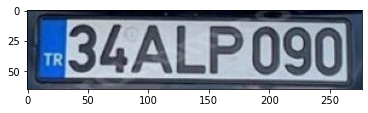

In [12]:
plt.imshow(img)

In [13]:
result[0][0]

('34alpo90', array([[ 33.17829 ,   8.698236],
        [268.41876 ,  12.107517],
        [267.76358 ,  57.315422],
        [ 32.52311 ,  53.90614 ]], dtype=float32))

In [14]:
result[0][1]

('tr', array([[13., 35.],
        [32., 35.],
        [32., 49.],
        [13., 49.]], dtype=float32))

In [16]:
temp_arr = []

In [17]:
result[0]

[('34alpo90', array([[ 33.17829 ,   8.698236],
         [268.41876 ,  12.107517],
         [267.76358 ,  57.315422],
         [ 32.52311 ,  53.90614 ]], dtype=float32)), ('tr', array([[13., 35.],
         [32., 35.],
         [32., 49.],
         [13., 49.]], dtype=float32))]

In [18]:
for idx in result[0]:
  temp_arr.append(idx[1][0][0])

In [19]:
string = ""

In [20]:
for idx in range(len(temp_arr)):
  print(temp_arr)
  string += f"{result[0][temp_arr.index(np.min(temp_arr))][0]}"
  temp_arr.remove(np.min(temp_arr))
print(string)

[33.17829, 13.0]
[33.17829]
tr34alpo90


In [53]:
def read_plate(path):
  result = pipeline.recognize([keras_ocr.tools.read(path)])
  print(result)
  temp_arr = []
  for idx in result[0]:
    temp_arr.append(idx[1][0][0])
    text = ""
  for idx in range(len(temp_arr)):
    text += f"{result[0][temp_arr.index(np.min(temp_arr))][0]}"
    temp_arr[temp_arr.index(np.min(temp_arr))] += 50000
  plt.imshow(keras_ocr.tools.read(path))
  print("Detected text: ", text)

1/1 [==============================] - 0s 45ms/step
[[('b4azro4', array([[ 48.109333,  15.247736],
       [323.71887 ,   9.505838],
       [324.85638 ,  64.10714 ],
       [ 49.246857,  69.84904 ]], dtype=float32)), ('tr', array([[24., 44.],
       [47., 44.],
       [47., 59.],
       [24., 59.]], dtype=float32))]]
Detected text:  trb4azro4


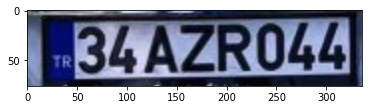

In [54]:
read_plate("/content/test_image_3.PNG")

1/1 [==============================] - 0s 45ms/step
[[('34alpo90', array([[ 33.17829 ,   8.698236],
       [268.41876 ,  12.107517],
       [267.76358 ,  57.315422],
       [ 32.52311 ,  53.90614 ]], dtype=float32)), ('tr', array([[13., 35.],
       [32., 35.],
       [32., 49.],
       [13., 49.]], dtype=float32))]]
Detected text:  tr34alpo90


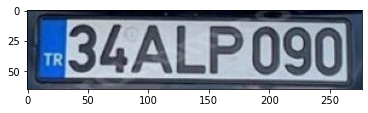

In [55]:
read_plate("/content/test_image_1.png")

1/1 [==============================] - 0s 57ms/step
[[('009', array([[261.13528 ,  15.773897],
       [385.3519  ,   9.714533],
       [387.97147 ,  63.416016],
       [263.75485 ,  69.47538 ]], dtype=float32)), ('dd', array([[122.21021 ,  21.301834],
       [217.51747 ,  19.356781],
       [218.58575 ,  71.70232 ],
       [123.27849 ,  73.64737 ]], dtype=float32)), ('17', array([[25., 22.],
       [80., 22.],
       [80., 72.],
       [25., 72.]], dtype=float32)), ('r', array([[-5.204749e-16,  5.000000e+01],
       [ 2.500000e+01,  5.000000e+01],
       [ 2.500000e+01,  6.700000e+01],
       [ 0.000000e+00,  6.700000e+01]], dtype=float32))]]
Detected text:  r17dd009


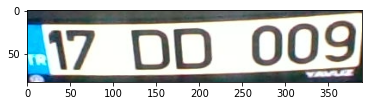

In [56]:
read_plate("/content/2023-02-23-17-30-37-0.png")

1/1 [==============================] - 0s 55ms/step
[[('34', array([[16.,  4.],
       [69.,  4.],
       [69., 44.],
       [16., 44.]], dtype=float32)), ('yj', array([[ 73.,   4.],
       [128.,   4.],
       [128.,  44.],
       [ 73.,  44.]], dtype=float32)), ('1808', array([[138.,   3.],
       [234.,   3.],
       [234.,  46.],
       [138.,  46.]], dtype=float32)), ('tr', array([[ 2., 25.],
       [18., 25.],
       [18., 37.],
       [ 2., 37.]], dtype=float32))]]
Detected text:  tr34yj1808


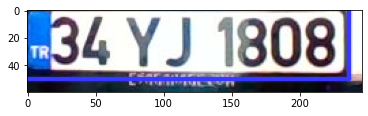

In [57]:
read_plate("/content/2023-02-23-17-53-22-0.png")

1/1 [==============================] - 0s 54ms/step
[[('8l', array([[11., 13.],
       [37., 13.],
       [37., 42.],
       [11., 42.]], dtype=float32)), ('fb', array([[37., 18.],
       [74., 18.],
       [74., 50.],
       [37., 50.]], dtype=float32)), ('1907', array([[ 69.72951 ,  23.97541 ],
       [121.75409 ,  28.704918],
       [118.959015,  59.450813],
       [ 66.93443 ,  54.721306]], dtype=float32))]]
Detected text:  8lfb1907


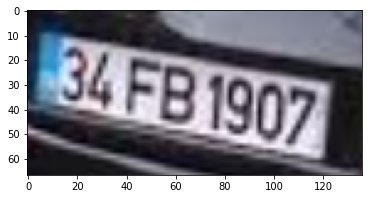

In [58]:
read_plate("/content/test_image_4.PNG")